In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt

In [ ]:
path_module = "./Input/Flevoland/Flevoland_l_db"
image = np.asarray(sp.io.envi.open(path_module + '.hdr', path_module + '.raw').asarray())

In [11]:
image_filtered = image.copy()
image_filt_normalized = image.copy()
image_normalized = image.copy()
for band in range(image.shape[2]):
    #calc stats
    mean = image[:,:,band].mean()
    sd = image[:,:,band].std()
    #cut off outliers
    image_filtered[image[:,:,band] > mean + 3*sd, band] = mean + 3*sd
    image_filtered[image[:,:,band] < mean - 3*sd, band] = mean - 3*sd
    maxim = image_filtered[:,:,band].max()
    minim = image_filtered[:,:,band].min()
    #normalize between 0 and 1
    image_filt_normalized[:,:,band] = (maxim - image_filtered[:,:,band]) / (maxim - minim)

    maxim = image[:,:,band].max()
    minim = image[:,:,band].min()
    #normalize between 0 and 1
    image_normalized[:,:,band] = (maxim - image[:,:,band]) / (maxim - minim)




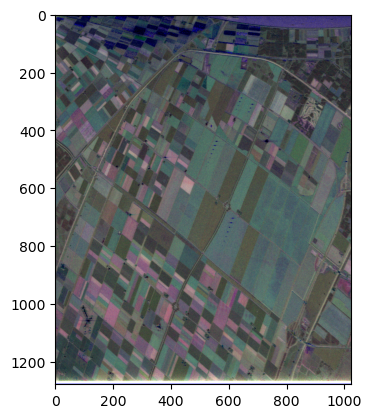

In [16]:
# sp.envi.save_image(path_module + "_pp.hdr", image_filt_normalized, dtype=np.float32, ext='.raw',force=True)
plt.imshow(image_filt_normalized)

In [4]:
path_module = "./Input/Flevoland/Flevoland_l"
image = np.asarray(sp.io.envi.open(path_module + '.hdr', path_module + '.raw').asarray())

In [5]:
image = np.log(image + 0.1)

image_filtered = image.copy()
image_filt_normalized = image.copy()
image_normalized = image.copy()
for band in range(image.shape[2]):
    #calc stats
    mean = image[:,:,band].mean()
    sd = image[:,:,band].std()
    #cut off outliers
    image_filtered[image[:,:,band] > mean + 3*sd, band] = mean + 3*sd
    image_filtered[image[:,:,band] < mean - 3*sd, band] = mean - 3*sd
    maxim = image_filtered[:,:,band].max()
    minim = image_filtered[:,:,band].min()
    #normalize between 0 and 1
    image_filt_normalized[:,:,band] = (maxim - image_filtered[:,:,band]) / (maxim - minim)

    maxim = image[:,:,band].max()
    minim = image[:,:,band].min()
    #normalize between 0 and 1
    image_normalized[:,:,band] = (maxim - image[:,:,band]) / (maxim - minim)

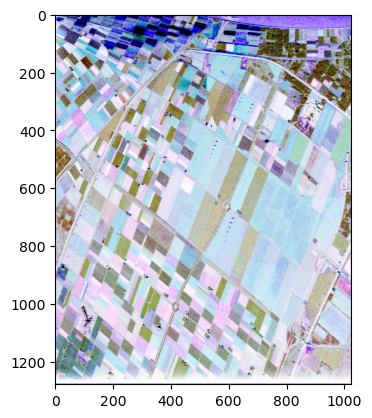

In [8]:
# sp.envi.save_image(path_module + "_pp.hdr", image_filt_normalized, dtype=np.float32, ext='.raw',force=True)
plt.imshow(image_filt_normalized)

In [11]:
train_map2 = np.load('Input/Flevoland/train_map.npy')

path_train_map = "./Input/Flevoland/TrainMap_FL"
train_map =  np.asarray(sp.io.envi.open(path_train_map + '.hdr', path_train_map + '.raw').asarray())

In [13]:
print((train_map!=0).sum())
print((train_map2!=0).sum())

123967
2493


In [10]:
np.unique(train_map, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13], dtype=uint8),
 array([1185729,   17621,   32854,   16475,   40019,    2336,    2409,
           4156,    1258,     120,     559,    5800,     360], dtype=int64))